<a href="https://colab.research.google.com/github/AnshumanDec2K/ML_Model_implementation/blob/main/ensemble_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook contains implementation of "Ensemble Technique"

In [1]:
# Import required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load the dataset 

In [2]:
# Read the required data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
#print(df.head())
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


#Attribute Information:

#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

### EDA 

In [3]:
df.info()
#df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
# Drop Name 
X = df.drop('status', axis=1)
X = X.drop('name', axis=1)
y = df['status']

In [5]:
# Status will be dependent variable, check it's distribution
df.groupby(['status']).size()
# Most of the patients have Parkinson's disease

status
0     48
1    147
dtype: int64

In [6]:
# Check Summary Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


### MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:PPQ, MDVP:RAP, MDVP:shimmer(dB) Mean and 50% values are not similar, seems outlier present
### MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz): It's not normal data by distribution, most of the observations are spread more than 3 standard deviations on each side of the mean.

In [7]:
# Check for missing values
df.isnull().values.any()

False

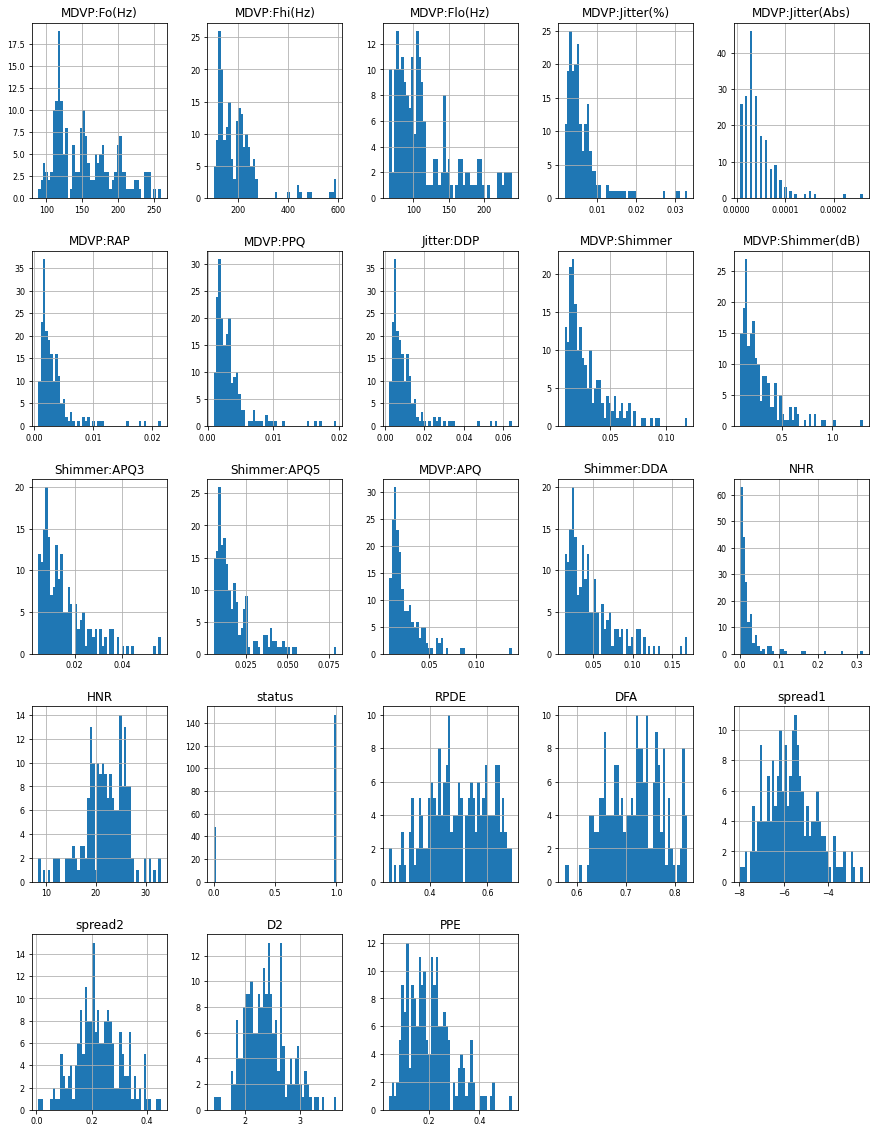

In [8]:
# Plot the distribution for each variable
df.hist(figsize=(15,20),bins = 50,xlabelsize=8,ylabelsize =8)
plt.show()

MDVP:Fhi(Hz): Distribution is right-skewed as mean is greater than the median and there seems several outliers in the data 

MDVP:PPQ, MDVP:RAP, MDVP:shimmer(dB) : Distribution is right-skewed and there seems several outliers in the data

Spread1, Spread2 : Distribution seems uniform 

### Univariate & Bivariate Analysis

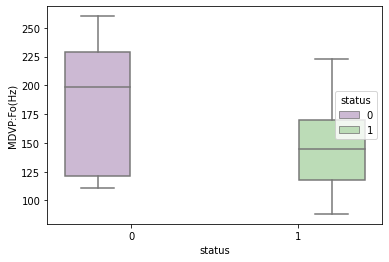

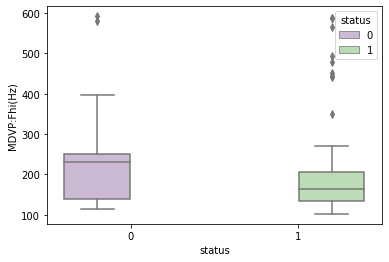

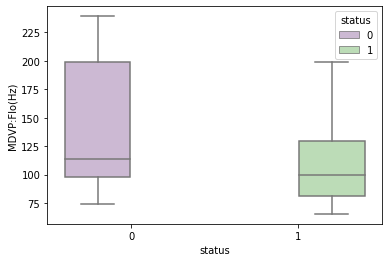

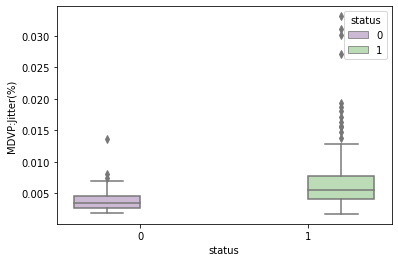

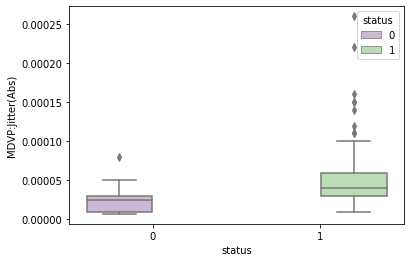

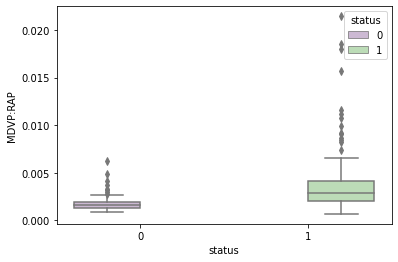

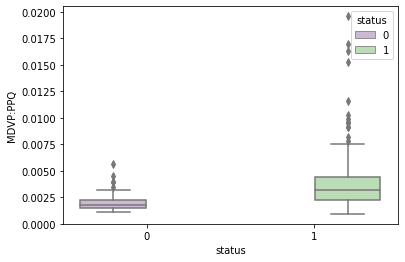

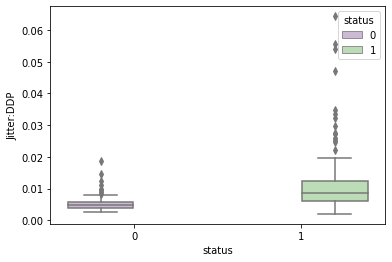

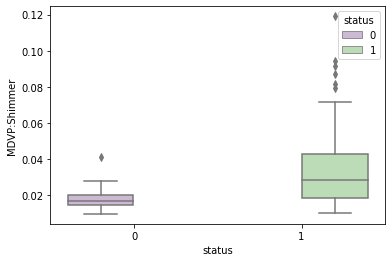

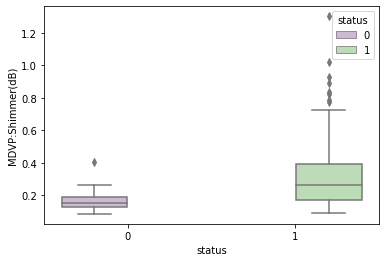

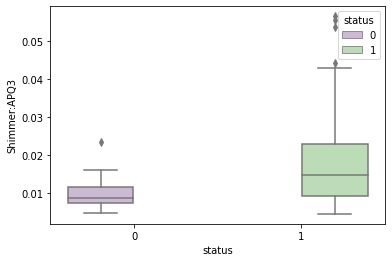

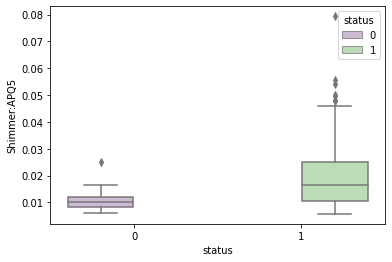

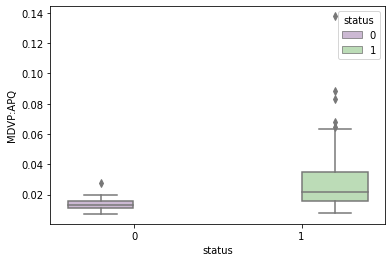

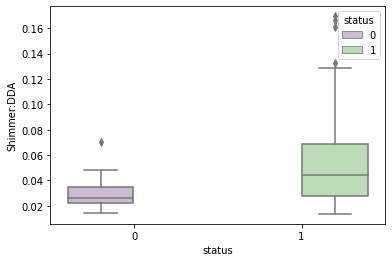

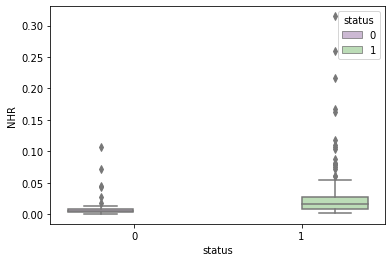

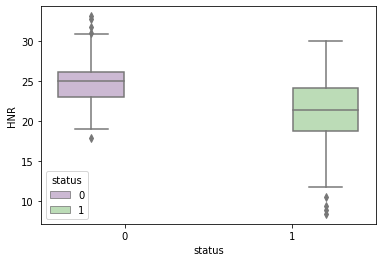

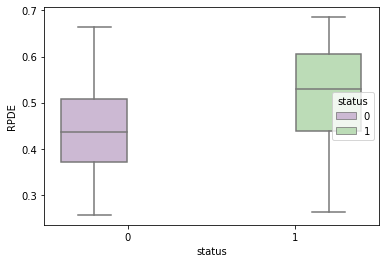

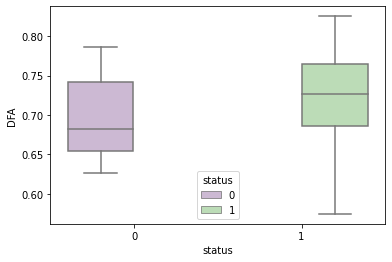

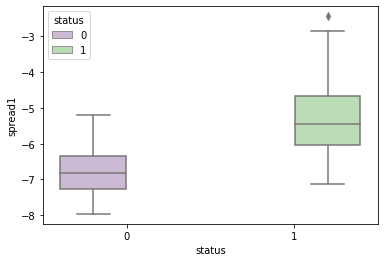

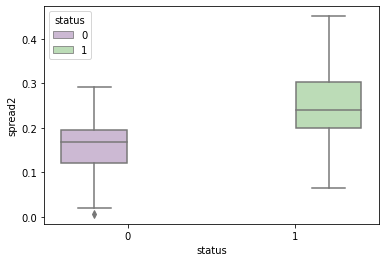

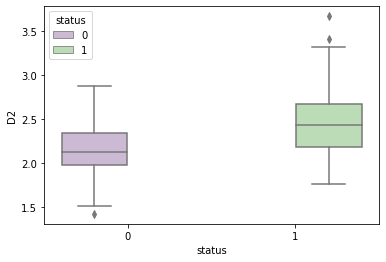

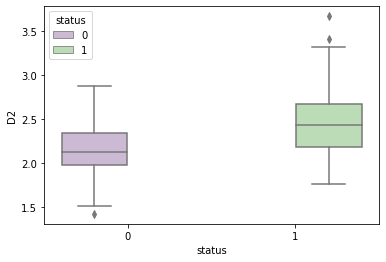

In [9]:
sns.boxplot(x="status", y="MDVP:Fo(Hz)", hue="status", data=df, palette="PRGn")
plt.show()

sns.boxplot(x="status", y="MDVP:Fhi(Hz)", hue="status", data=df, palette="PRGn")
plt.show()

sns.boxplot(x="status", y="MDVP:Flo(Hz)", hue="status", data=df, palette="PRGn")
plt.show()

sns.boxplot(x="status", y="MDVP:Jitter(%)", hue="status", data=df, palette="PRGn")
plt.show()

sns.boxplot(x="status", y="MDVP:Jitter(Abs)", hue="status", data=df, palette="PRGn")
plt.show()

sns.boxplot(x="status", y="MDVP:RAP", hue="status", data=df, palette="PRGn")
plt.show()

sns.boxplot(x="status", y="MDVP:PPQ", hue="status", data=df, palette="PRGn")
plt.show()

sns.boxplot(x="status", y="Jitter:DDP", hue="status", data=df, palette="PRGn")
plt.show()

sns.boxplot(x="status", y="MDVP:Shimmer", hue="status", data=df, palette="PRGn")
plt.show()

sns.boxplot(x="status", y="MDVP:Shimmer(dB)", hue="status", data=df, palette="PRGn")
plt.show()

sns.boxplot(x="status", y="Shimmer:APQ3", hue="status", data=df, palette="PRGn")
plt.show()

sns.boxplot(x="status", y="Shimmer:APQ5", hue="status", data=df, palette="PRGn")
plt.show()

sns.boxplot(x="status", y="MDVP:APQ", hue="status", data=df, palette="PRGn")
plt.show()

sns.boxplot(x="status", y="Shimmer:DDA", hue="status", data=df, palette="PRGn")
plt.show()

sns.boxplot(x="status", y="NHR", hue="status", data=df, palette="PRGn")
plt.show()

sns.boxplot(x="status", y="HNR", hue="status", data=df, palette="PRGn")
plt.show()

sns.boxplot(x="status", y="RPDE", hue="status", data=df, palette="PRGn")
plt.show()

sns.boxplot(x="status", y="DFA", hue="status", data=df, palette="PRGn")
plt.show()

sns.boxplot(x="status", y="spread1", hue="status", data=df, palette="PRGn")
plt.show()

sns.boxplot(x="status", y="spread2", hue="status", data=df, palette="PRGn")
plt.show()


sns.boxplot(x="status", y="D2", hue="status", data=df, palette="PRGn")
plt.show()

sns.boxplot(x="status", y="D2", hue="status", data=df, palette="PRGn")
plt.show()

###  MDVP:Fo(Hz) varies a lot on the upper quartile group which is shown by the long whisker on the upper fence. There are no outliers in the data .
### MDVP:Fhi(Hz) varies a lot on the upper quartile group which is shown by the long whisker on the upper fence. Outliers are present in the data
### MDVP:Flo(Hz) varies a lot on the upper quartile group which is shown by the long whisker on the upper fence. Outliers are present in the data
### MDVP:Jitter(%) varies on the upper quartile group which is shown by the long whisker on the upper fence.Due to most of the datapoints are outliers the median is very low
### MDVP:Jitter(Abs) varies on the upper quartile group. Presence of outliers makes the distribution right-skewed
### MDVP:RAP varies on the upper quartile group especially for status=1 . Due to most of the datapoints are outliers the median is very low 
### NHR data variability/spread is very high and most of the datapoints are outliers . So the IQR is so narrow with median value close to the Q1 value


In [10]:
# Check the correlation
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


#### There is no strong correlation between any two variables.
### There is no strong correlation between any independent variable and dependent variable.
### MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,HNR,RPDE,spread1,spread2,D2,PPE have moderate correlation with the target variable - status
### spread1 has a significant correlation with spread2,D2,PPE
### Due to limited domain knowledge, let's not do any treatment for outliers

In [11]:
# Correlation between status and other independent variables
df.corr()["status"]

MDVP:Fo(Hz)        -0.383535
MDVP:Fhi(Hz)       -0.166136
MDVP:Flo(Hz)       -0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
NHR                 0.189429
HNR                -0.361515
status              1.000000
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
Name: status, dtype: float64

### Split dataset into training & test dataset  

In [12]:
# Split the data into training and test set in the ratio of 70:30 respectively
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, random_state=1)

### Create a default decision tree model using criterion = Entropy 

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy')

In [14]:
from sklearn.metrics import accuracy_score
y_predict = dtc.predict(X_test)
accuracy_score(y_test, y_predict)

0.8983050847457628

### Model Regularization 

In [15]:
dtc2 = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=2)
dtc2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=2)

In [16]:
y_predict = dtc2.predict(X_test)
accuracy_score(y_test, y_predict)

0.8135593220338984

In [17]:
dtc3 = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=5)
dtc3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=5)

In [18]:
y_predict = dtc3.predict(X_test)
accuracy_score(y_test, y_predict)

0.864406779661017

In [19]:
dtc3 = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=10)
dtc3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=10)

In [20]:
y_predict = dtc3.predict(X_test)
accuracy_score(y_test, y_predict)

0.864406779661017

In [21]:
dtc4 = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=15)
dtc4.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=15)

In [22]:
y_predict = dtc4.predict(X_test)
accuracy_score(y_test, y_predict)

0.8983050847457628

As you can see from the above models, the ideal no of leaf nodes is between 10 to 15. The ideal no of leaf_nodes and depth of the tree can be found out by running these model iteratively by tuning the hyperparameters. In the above case, I have showcased how accuracy values change for few cases. 
It would be a right call to use Grid search or ROC curve (which you will be learning later as a part of this program) to find out the optimal hyperparameters. 

### Cross tab & Accuracy of the models 

In [23]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Healthy', 'Predicted Parkinsons'],
    index=['True Healthy', 'True Parkinsons']
)

,Predicted Healthy,Predicted Parkinsons
True Healthy,14,5
True Parkinsons,1,39


### Random forest classifier

In [24]:
# Use the classification algorithms and compare the models to find the best model
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

In [25]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
accuracy_score(y_test, y_predict)

0.8305084745762712

In [27]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Healthy', 'Predicted Parkinsons'],
    index=['True Healthy', 'True Parkinsons']
)

,Predicted Healthy,Predicted Parkinsons
True Healthy,10,9
True Parkinsons,1,39
